# Series de Tiempo

## Librerías

In [1]:
# Instalar librerias
!pip install --upgrade pandas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.__version__

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


'1.3.5'

## Conectarse a Drive

In [2]:
# 2.libreria de google
from google.colab import drive

# 3-4.ejecutar el comando  . . para . . 
drive.mount('/content/drive')

Mounted at /content/drive


## Leer archivo

In [3]:
# usar la función read_csv
pd.read_csv('/content/drive/My Drive/Colab Notebooks/Platzi_courses_data/db/covid_19_data.csv')
# asignarle una variable al codigo anterior
df_read = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Platzi_courses_data/db/covid_19_data.csv')
df_read

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
3390,3391,03/04/2020,NaN,Ukraine,2020-03-03T15:33:02,1.0,0.0,0.0
3391,3392,03/04/2020,From Diamond Princess,Australia,2020-02-29T02:03:10,0.0,0.0,0.0
3392,3393,03/04/2020,"Lackland, TX (From Diamond Princess)",US,2020-02-24T23:33:02,0.0,0.0,0.0
3393,3394,03/04/2020,"Omaha, NE (From Diamond Princess)",US,2020-02-24T23:33:02,0.0,0.0,0.0


## Crear copia del archivo

In [4]:
# 
df = df_read.copy(deep=True)
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
3390,3391,03/04/2020,NaN,Ukraine,2020-03-03T15:33:02,1.0,0.0,0.0
3391,3392,03/04/2020,From Diamond Princess,Australia,2020-02-29T02:03:10,0.0,0.0,0.0
3392,3393,03/04/2020,"Lackland, TX (From Diamond Princess)",US,2020-02-24T23:33:02,0.0,0.0,0.0
3393,3394,03/04/2020,"Omaha, NE (From Diamond Princess)",US,2020-02-24T23:33:02,0.0,0.0,0.0


## Dar formato tipo tiempo

In [5]:
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])

### Ver las columnas en un listado

In [6]:

list(df)

['SNo',
 'ObservationDate',
 'Province/State',
 'Country/Region',
 'Last Update',
 'Confirmed',
 'Deaths',
 'Recovered']

### Seleccionar algunas columnas para desplegarlas en el dataframe

In [7]:
# 1 Pegar columnas y eliminar
df = df[['ObservationDate',
 'Country/Region',
 'Confirmed',
 'Deaths',
 'Recovered']]

In [8]:
# 2 desplegar el dataframe modificado
df

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
0,2020-01-22,Mainland China,1.0,0.0,0.0
1,2020-01-22,Mainland China,14.0,0.0,0.0
2,2020-01-22,Mainland China,6.0,0.0,0.0
3,2020-01-22,Mainland China,1.0,0.0,0.0
4,2020-01-22,Mainland China,0.0,0.0,0.0
...,...,...,...,...,...
3390,2020-03-04,Ukraine,1.0,0.0,0.0
3391,2020-03-04,Australia,0.0,0.0,0.0
3392,2020-03-04,US,0.0,0.0,0.0
3393,2020-03-04,US,0.0,0.0,0.0


## Realizar operaciones matemáticas entre dataframes usando como índice el tiempo.

1. Convertir la columna de tiempo 'ObservationDate' en índice en un nuevo dataframe

2. Seleccionar muestras y crear dataframes
3. Realizar operaciones entre series

In [9]:
# 1. Convertir la columna de tiempo 'ObservationDate' en índice en un nuevo dataframe 
df_time = df.groupby('ObservationDate').sum()
df_time.head(5)

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,653.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,1438.0,42.0,39.0
2020-01-26,2118.0,56.0,52.0


In [10]:
# 2. Seleccionar muestras y crear dataframes. Selecionar desde la columna 10 a la 15, eligiendo los casos confirmado 'Confirmed'
df1 = df_time['Confirmed'].iloc[10:15]
df1

ObservationDate
2020-02-01    12038.0
2020-02-02    16787.0
2020-02-03    19881.0
2020-02-04    23892.0
2020-02-05    27636.0
Name: Confirmed, dtype: float64

In [11]:
# 2. Seleccionar muestras y crear dataframes. Selecionar desde la columna 12 a la 17, eligiendo los casos fallecidos 'Deaths'
df2 = df_time['Deaths'].iloc[12:17]
df2

ObservationDate
2020-02-03    426.0
2020-02-04    492.0
2020-02-05    564.0
2020-02-06    634.0
2020-02-07    719.0
Name: Deaths, dtype: float64

Al tener estas dos series, df1 y df2, se pueden realizar operaciones entre las mismas. Esto ocurre porque ambas tienen un sistema de índice por fechas

In [12]:
# 3. Realizar operaciones entre series
# Calcular el número de casos que están sobreviviendo, restando el número de casos confirmados menos el número de casos fallecidos
df1 - df2

ObservationDate
2020-02-01        NaN
2020-02-02        NaN
2020-02-03    19455.0
2020-02-04    23400.0
2020-02-05    27072.0
2020-02-06        NaN
2020-02-07        NaN
dtype: float64

Las operaciones se realizan únicamente entre los datos que tienen índices de fechas iguales.

Los que que no coinciden los índices se presenta como NaN

## Calcular el número de casos en aumento por día

In [13]:
# nalizar el dataframe en la columna 'Confirmed'
df_time

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,653.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,1438.0,42.0,39.0
2020-01-26,2118.0,56.0,52.0
2020-01-27,2927.0,82.0,61.0
2020-01-28,5578.0,131.0,107.0
2020-01-29,6165.0,133.0,126.0
2020-01-30,8235.0,171.0,143.0


In [14]:
df_time['Confirmed'].min()

555.0

In [15]:
df_time['Confirmed'].max()

95124.0

In [16]:
# El comando diff resta el valor con el valor del día anterior, asi calcula el incremente de casos dia a dia
df_time.diff()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,NaN,NaN,NaN
2020-01-23,98.0,1.0,2.0
2020-01-24,288.0,8.0,6.0
2020-01-25,497.0,16.0,3.0
2020-01-26,680.0,14.0,13.0
2020-01-27,809.0,26.0,9.0
2020-01-28,2651.0,49.0,46.0
2020-01-29,587.0,2.0,19.0
2020-01-30,2070.0,38.0,17.0


In [17]:
# Calcular el promedio
df_time.diff().mean()

Confirmed    2251.642857
Deaths         77.071429
Recovered    1217.690476
dtype: float64

In [18]:
# crear un dataframe
df_diff = df_time.diff()

La primera fila aparace como NaN porque no tiene con quien restarse, se puede completar de la siguiente manera:

1. Extraer el dato faltante
2. Crear un diccionario con el paso 1
3. Usar el comando fillna() para agregarlo al dataframe df_time
4. Reasignar df_time con el resultado del paso 3

In [19]:
# 1. Extraer el dato faltante
df_time.head(1)

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0


In [20]:
# 2. Crear un diccionario con el paso 1
df_time.head(1).to_dict()

{'Confirmed': {Timestamp('2020-01-22 00:00:00'): 555.0},
 'Deaths': {Timestamp('2020-01-22 00:00:00'): 17.0},
 'Recovered': {Timestamp('2020-01-22 00:00:00'): 28.0}}

In [21]:
# 3. Usar el comando fillna() para agregarlo al dataframe df_time
# 3.1 Copiar el resultado del paso 2
# 3.2 Pegar dentro del parentesis de fillna()
# 3.3 eliminar los datos de Timestamp
# Ejecutar programa
df_diff.fillna({'Confirmed': 555.0,
 'Deaths': 17.0,
 'Recovered': 28.0})

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,98.0,1.0,2.0
2020-01-24,288.0,8.0,6.0
2020-01-25,497.0,16.0,3.0
2020-01-26,680.0,14.0,13.0
2020-01-27,809.0,26.0,9.0
2020-01-28,2651.0,49.0,46.0
2020-01-29,587.0,2.0,19.0
2020-01-30,2070.0,38.0,17.0


In [22]:
# 4. Reasignar df_time con el resultado del paso 3
df_diff = df_diff.fillna({'Confirmed': 555.0,
 'Deaths': 17.0,
 'Recovered': 28.0})

df_diff

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,98.0,1.0,2.0
2020-01-24,288.0,8.0,6.0
2020-01-25,497.0,16.0,3.0
2020-01-26,680.0,14.0,13.0
2020-01-27,809.0,26.0,9.0
2020-01-28,2651.0,49.0,46.0
2020-01-29,587.0,2.0,19.0
2020-01-30,2070.0,38.0,17.0


## Calcular suma acumulativa con el comando cumsum()

In [23]:
df_diff.cumsum()
# De esta forma, se regresa a los valores iniciales del dataframe df_time

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,653.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,1438.0,42.0,39.0
2020-01-26,2118.0,56.0,52.0
2020-01-27,2927.0,82.0,61.0
2020-01-28,5578.0,131.0,107.0
2020-01-29,6165.0,133.0,126.0
2020-01-30,8235.0,171.0,143.0


## Realizar muestreos por tiempo

### Realizar un muestreo cada 7 dias

In [24]:
df_diff.resample('7D').sum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,5578.0,131.0,107.0
2020-01-29,18314.0,361.0,745.0
2020-02-05,20911.0,621.0,3831.0
2020-02-12,30335.0,894.0,9669.0
2020-02-19,5277.0,701.0,13553.0
2020-02-26,12429.0,452.0,20324.0
2020-03-04,2280.0,94.0,2942.0


El resultado es la suma acumulativa de los 7 días del muestreo

### Realizar un muestreo por semana

In [25]:
df_diff.resample('W-Sun').sum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-26,2118.0,56.0,52.0
2020-02-02,14669.0,306.0,420.0
2020-02-09,23364.0,544.0,2772.0
2020-02-16,31075.0,864.0,7621.0
2020-02-23,7759.0,699.0,12529.0
2020-03-01,9386.0,527.0,19322.0
2020-03-08,6753.0,258.0,8455.0


### Realizar muestreo por mes

In [26]:
df_diff.resample('M').sum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,9925.0,213.0,222.0
2020-02-29,76088.0,2728.0,39560.0
2020-03-31,9111.0,313.0,11389.0


### Número de filas por mes

In [27]:
df_diff.resample('M').count()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,10,10,10
2020-02-29,29,29,29
2020-03-31,4,4,4


# Series de Tiempo: Variables nulas y como trabajar con ellas

En este ejercicio, se creará un muestreo por cada 12 horas. Se observara que en algunas filas tendran valores a 0 todas las columnas, esto es porque en ese intervalo de tiempo no hay datos y se autocompleta con 0.

In [28]:
df_diff.resample('12h').sum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,0.0,0.0,0.0
2020-01-23 00:00:00,98.0,1.0,2.0
2020-01-23 12:00:00,0.0,0.0,0.0
2020-01-24 00:00:00,288.0,8.0,6.0
...,...,...,...
2020-03-02 00:00:00,1938.0,89.0,2886.0
2020-03-02 12:00:00,0.0,0.0,0.0
2020-03-03 00:00:00,2535.0,75.0,2627.0


In [29]:
# En el promedio, se genern valores nulos NaN
df_diff.resample('12h').mean()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,NaN,NaN,NaN
2020-01-23 00:00:00,98.0,1.0,2.0
2020-01-23 12:00:00,NaN,NaN,NaN
2020-01-24 00:00:00,288.0,8.0,6.0
...,...,...,...
2020-03-02 00:00:00,1938.0,89.0,2886.0
2020-03-02 12:00:00,NaN,NaN,NaN
2020-03-03 00:00:00,2535.0,75.0,2627.0


In [30]:
# para que se realice la suma, cuando haya por lo menos un elemento
df_time.resample('12h').sum(min_count=1)

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,NaN,NaN,NaN
2020-01-23 00:00:00,653.0,18.0,30.0
2020-01-23 12:00:00,NaN,NaN,NaN
2020-01-24 00:00:00,941.0,26.0,36.0
...,...,...,...
2020-03-02 00:00:00,90309.0,3085.0,45602.0
2020-03-02 12:00:00,NaN,NaN,NaN
2020-03-03 00:00:00,92844.0,3160.0,48229.0


In [31]:
# Muestreo con dt_time
# guardarlo en df_cum
df_cum = df_time.resample('12h').sum(min_count=1)
df_cum

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,NaN,NaN,NaN
2020-01-23 00:00:00,653.0,18.0,30.0
2020-01-23 12:00:00,NaN,NaN,NaN
2020-01-24 00:00:00,941.0,26.0,36.0
...,...,...,...
2020-03-02 00:00:00,90309.0,3085.0,45602.0
2020-03-02 12:00:00,NaN,NaN,NaN
2020-03-03 00:00:00,92844.0,3160.0,48229.0


In [32]:
# El comando bfill(), llena los valores nulos con los valores de la fila siguiente
df_cum.bfill()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,653.0,18.0,30.0
2020-01-23 00:00:00,653.0,18.0,30.0
2020-01-23 12:00:00,941.0,26.0,36.0
2020-01-24 00:00:00,941.0,26.0,36.0
...,...,...,...
2020-03-02 00:00:00,90309.0,3085.0,45602.0
2020-03-02 12:00:00,92844.0,3160.0,48229.0
2020-03-03 00:00:00,92844.0,3160.0,48229.0


In [33]:
# El comando ffill(), llena los valores nulos con los valores de la fila anterior
df_cum.ffill()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,555.0,17.0,28.0
2020-01-23 00:00:00,653.0,18.0,30.0
2020-01-23 12:00:00,653.0,18.0,30.0
2020-01-24 00:00:00,941.0,26.0,36.0
...,...,...,...
2020-03-02 00:00:00,90309.0,3085.0,45602.0
2020-03-02 12:00:00,90309.0,3085.0,45602.0
2020-03-03 00:00:00,92844.0,3160.0,48229.0


In [34]:
# El comando fillna(), llena los valores nulos con los valores que se deseen asignar
df_cum.fillna(-1000)

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,-1000.0,-1000.0,-1000.0
2020-01-23 00:00:00,653.0,18.0,30.0
2020-01-23 12:00:00,-1000.0,-1000.0,-1000.0
2020-01-24 00:00:00,941.0,26.0,36.0
...,...,...,...
2020-03-02 00:00:00,90309.0,3085.0,45602.0
2020-03-02 12:00:00,-1000.0,-1000.0,-1000.0
2020-03-03 00:00:00,92844.0,3160.0,48229.0


In [35]:
# El comando interpolate(), llena los valores nulos con el promedio de los valores de la fila anterior y siguiente
df_cum.interpolate()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,604.0,17.5,29.0
2020-01-23 00:00:00,653.0,18.0,30.0
2020-01-23 12:00:00,797.0,22.0,33.0
2020-01-24 00:00:00,941.0,26.0,36.0
...,...,...,...
2020-03-02 00:00:00,90309.0,3085.0,45602.0
2020-03-02 12:00:00,91576.5,3122.5,46915.5
2020-03-03 00:00:00,92844.0,3160.0,48229.0


In [36]:
# Crear una nueva columna que contenga la taza de supervivencia 
df_cum['rate'] = 1 - df_cum['Deaths'] / df_cum['Confirmed']
df_cum

,Confirmed,Deaths,Recovered,rate
ObservationDate,,,,
2020-01-22 00:00:00,555.0,17.0,28.0,0.969369
2020-01-22 12:00:00,NaN,NaN,NaN,NaN
2020-01-23 00:00:00,653.0,18.0,30.0,0.972435
2020-01-23 12:00:00,NaN,NaN,NaN,NaN
2020-01-24 00:00:00,941.0,26.0,36.0,0.972370
...,...,...,...,...
2020-03-02 00:00:00,90309.0,3085.0,45602.0,0.965840
2020-03-02 12:00:00,NaN,NaN,NaN,NaN
2020-03-03 00:00:00,92844.0,3160.0,48229.0,0.965964


In [37]:

# quitar un indice / convertir un indice a columna 
df_cum = df_cum.reset_index()
df_cum

,ObservationDate,Confirmed,Deaths,Recovered,rate
0,2020-01-22 00:00:00,555.0,17.0,28.0,0.969369
1,2020-01-22 12:00:00,NaN,NaN,NaN,NaN
2,2020-01-23 00:00:00,653.0,18.0,30.0,0.972435
3,2020-01-23 12:00:00,NaN,NaN,NaN,NaN
4,2020-01-24 00:00:00,941.0,26.0,36.0,0.972370
...,...,...,...,...,...
80,2020-03-02 00:00:00,90309.0,3085.0,45602.0,0.965840
81,2020-03-02 12:00:00,NaN,NaN,NaN,NaN
82,2020-03-03 00:00:00,92844.0,3160.0,48229.0,0.965964
83,2020-03-03 12:00:00,NaN,NaN,NaN,NaN


## Calcular y graficar la variación de *rate* por tiempo
Cuando la columna de tiempo no pertenece al indice y extraer información  . . . . . se usa la función groupby(grouper) para columnas de tiempo que no son índices

In [38]:
df_cum.groupby(pd.Grouper(key='ObservationDate', freq = 'M'))[['rate']].mean()

,rate
ObservationDate,
2020-01-31,0.974323
2020-02-29,0.973668
2020-03-31,0.965923


### Gráfica de variación por día

1. Asignar variable. El código anterior asignarlo a una variable
2. Modificar la frecuencia. Cambiar la freq de mes (M) por dia (1D)
3. Graficar. El la variable del paso 1, usarl el comando plot()

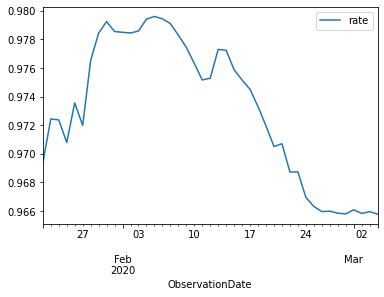

In [39]:
sr = df_cum.groupby(pd.Grouper(key='ObservationDate', freq = '1D'))[['rate']].mean()
sr.plot()

### Generar un suavizado en la curva

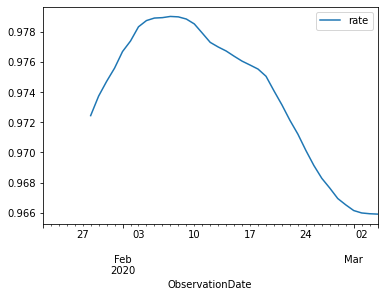

In [40]:
sr.rolling(window=7).mean().plot()

### Graficar con varias curvas

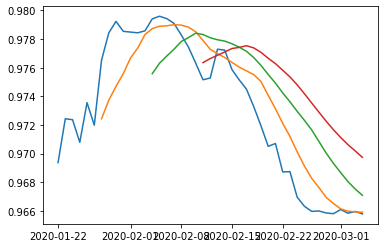

In [41]:
#sr.plot()
#sr.rolling(window=7).mean().plot()  # 7 dias
#sr.rolling(window=14).mean().plot() # 14 dias 
#sr.rolling(window=21).mean().plot()  # 21 dias

plt.plot(sr)
plt.plot(sr.rolling(window = 7).mean())
plt.plot(sr.rolling(window = 14).mean())
plt.plot(sr.rolling(window = 21).mean())

### Calcular y graficar la desviación Estandar (std) de la taza de supervivencia 'rate', creando una función *lambda*

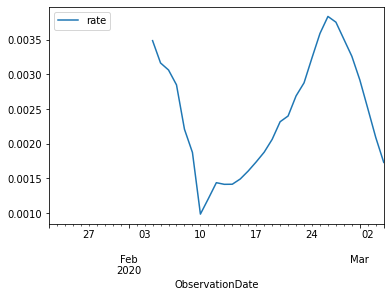

In [42]:
sr.rolling(window=14).apply(lambda x: np.std(x)).plot()

# Visualizar y Graficar Datos

## Contestar la siguiente pregunta:

### ¿Cuál es el país que tiene mas ocurrencias de coronvirus en este dataset?

In [43]:
# Este código muestra las ocurrencias de mayor a menor
df.groupby('Country/Region')['Confirmed'].max().sort_values(ascending=False)

Country/Region
Mainland China    67332.0
South Korea        5621.0
Italy              3089.0
Iran               2922.0
Others              706.0
                   ...   
Morocco               1.0
Nepal                 1.0
Nigeria               1.0
Latvia                1.0
Colombia              0.0
Name: Confirmed, Length: 90, dtype: float64

## Indices el país y el ObservationDate

In [44]:
df_time_co = df.groupby(['Country/Region', pd.Grouper(key='ObservationDate', freq='1D')]).sum()
df_time_co

Confirmed  Deaths  Recovered
Country/Region ObservationDate                              
 Azerbaijan    2020-02-28             1.0     0.0        0.0
Afghanistan    2020-02-24             1.0     0.0        0.0
               2020-02-25             1.0     0.0        0.0
               2020-02-26             1.0     0.0        0.0
               2020-02-27             1.0     0.0        0.0
...                                   ...     ...        ...
Vietnam        2020-02-29            16.0     0.0       16.0
               2020-03-01            16.0     0.0       16.0
               2020-03-02            16.0     0.0       16.0
               2020-03-03            16.0     0.0       16.0
               2020-03-04            16.0     0.0       16.0

[1462 rows x 3 columns]

## Trabajar solo con china

In [45]:
df_China = df_time_co.loc['Mainland China', :]
df_China

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,547.0,17.0,28.0
2020-01-23,639.0,18.0,30.0
2020-01-24,916.0,26.0,36.0
2020-01-25,1399.0,42.0,39.0
2020-01-26,2062.0,56.0,49.0
2020-01-27,2863.0,82.0,58.0
2020-01-28,5494.0,131.0,101.0
2020-01-29,6070.0,133.0,120.0
2020-01-30,8124.0,171.0,135.0


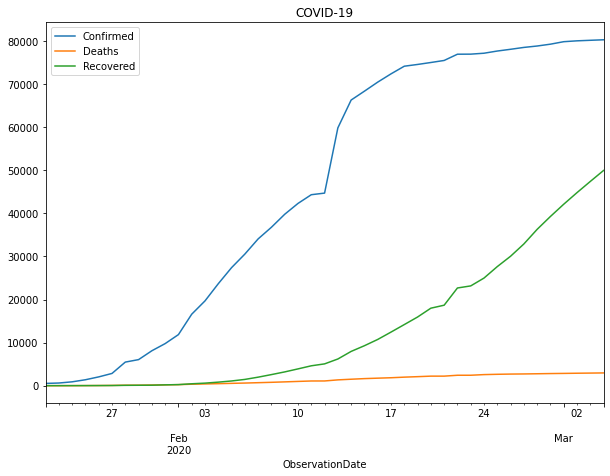

In [46]:
df_China.plot(figsize = (10,7), title = 'COVID-19')

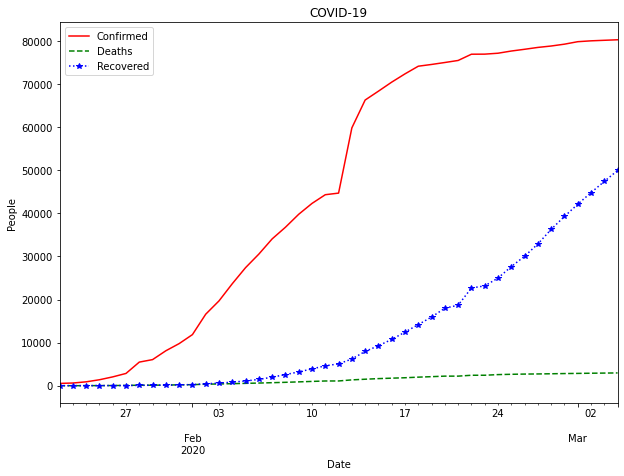

In [47]:
# Agregar información a los ejes con Matplotlib
ax = df_China.plot(figsize = (10,7), title = 'COVID-19', legend=False, style = ['r-','g--','b:*'])
ax.legend(['Confirmed','Deaths','Recovered'])
plt.xlabel('Date')
plt.ylabel('People')
plt.show()

In [48]:
# Ocurrencias Mensuales
df_montly = df_China.resample('M').max()
df_montly

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,9783.0,213.0,214.0
2020-02-29,79251.0,2835.0,39279.0
2020-03-31,80271.0,2981.0,49955.0


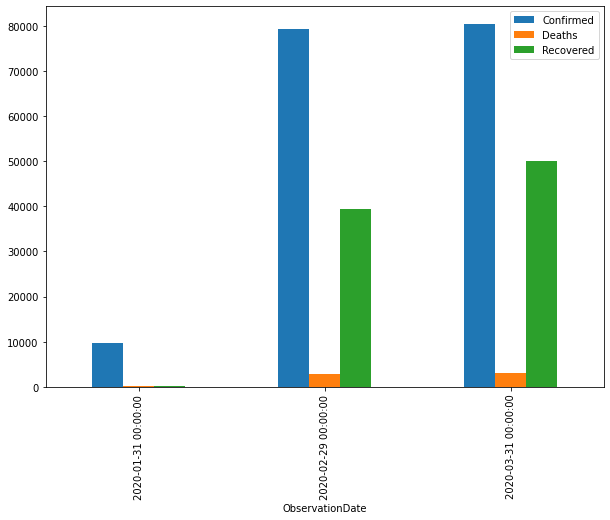

In [49]:
df_montly.plot(figsize = (10,7), kind='bar')

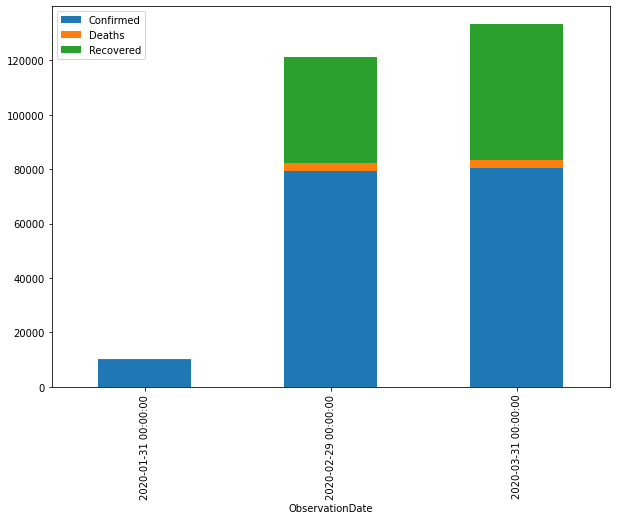

In [50]:
# Gráfica de barras superpuesta
df_montly.plot(figsize = (10,7), kind='bar', stacked = True)

In [51]:
# Crear una nueva columna para analizr los casos que están entratamiento. Para esto
# se restará el número de casos confirmados, menos el número de decesos y menos el número de casos recuperados
df_montly['Treatment'] = df_montly['Confirmed'] - df_montly['Deaths'] - df_montly['Recovered']
df_montly

,Confirmed,Deaths,Recovered,Treatment
ObservationDate,,,,
2020-01-31,9783.0,213.0,214.0,9356.0
2020-02-29,79251.0,2835.0,39279.0,37137.0
2020-03-31,80271.0,2981.0,49955.0,27335.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc5345b1510>,
      dtype=object)

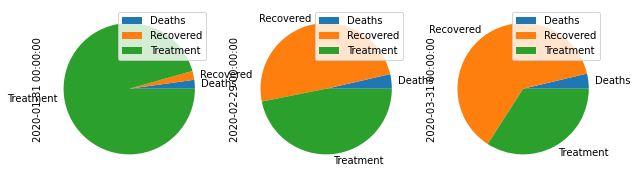

In [52]:
# Graficar la proporcionalidad de los casos
df_montly[['Deaths','Recovered','Treatment']].T.plot(figsize = (10,7), kind = 'pie', subplots = True)

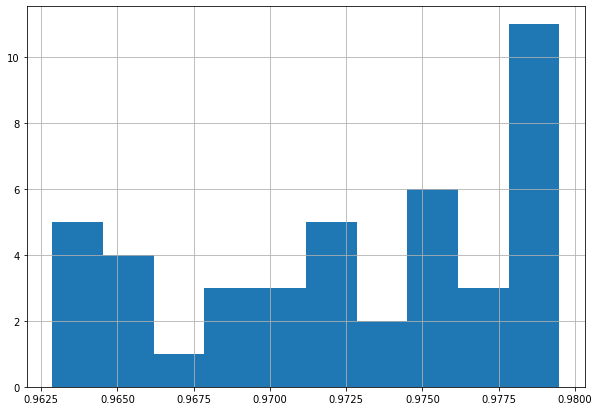

In [53]:
df_China['rate'] = 1- df_China['Deaths'] / df_China['Confirmed']
df_China['rate'].hist(figsize = (10,7))

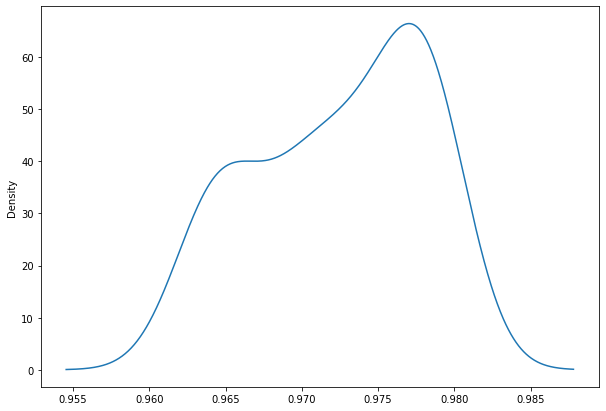

In [54]:
# Gráfica para métrica
df_China['rate'].plot(kind = 'kde',figsize = (10,7))